# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [2]:
training = pd.read_csv('data/dataset_1_train.txt', sep=",")
training.TimeMin = training.TimeMin/1440
training.head()

,TimeMin,PickupCount
0,0.597222,33.0
1,0.011806,75.0
2,0.337500,13.0
3,0.208333,5.0
4,0.267361,10.0


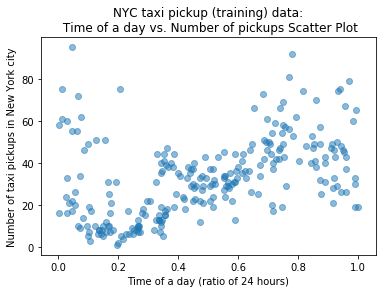

In [3]:
plt.scatter(training.TimeMin, training.PickupCount, alpha = 0.5)
plt.xlabel("Time of a day (ratio of 24 hours)")
plt.ylabel("Number of taxi pickups in New York city")
plt.title("NYC taxi pickup (training) data:\n Time of a day vs. Number of pickups Scatter Plot")

The scatter plot above shows the number of taxi pickups at different time of a day in New York city. We can see the busiest time in a day is between the ratio of 0 to 0.1 and 0.75 to 0.85, which is around 12am to 1:30am and 6pm to 8pm. There is also a peak around 0.95, the time when it is getting close to midnight. The busy time of taxi pickups are all around dinner time or night life time. Between work time (9am to 5pm, or 0.35 to 0.7 in the plot), the number of taxi pickups does note change very much, maintaining around 30 to 40 pickups. I guess most people choose public transportation such as subway to go to work on a daily routine, but for social life, which is more unpredictable than going to work, people are more likely to call a cab.

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

In [4]:
X_train = training['TimeMin'].values
y_train = training['PickupCount'].values
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

knn_model_1 = KNeighborsRegressor(n_neighbors=1)
knn_model_1.fit(X_train, y_train)

knn_model_2 = KNeighborsRegressor(n_neighbors=2)
knn_model_2.fit(X_train, y_train)

knn_model_10 = KNeighborsRegressor(n_neighbors=10)
knn_model_10.fit(X_train, y_train)

knn_model_25 = KNeighborsRegressor(n_neighbors=25)
knn_model_25.fit(X_train, y_train)

knn_model_50 = KNeighborsRegressor(n_neighbors=50)
knn_model_50.fit(X_train, y_train)

knn_model_100 = KNeighborsRegressor(n_neighbors=100)
knn_model_100.fit(X_train, y_train)

knn_model_200 = KNeighborsRegressor(n_neighbors=200)
knn_model_200.fit(X_train, y_train)

knn_model_250 = KNeighborsRegressor(n_neighbors=250)
knn_model_250.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=250, p=2,
          weights='uniform')

### ANSWER: Explain what happens when you invoke the fit function:

When the fit function is called, it will take X_train as training data and y_train as target values to fit the k-NN model.

In [5]:
X_train_sorted = np.sort(X_train, axis=None)
X_train_sorted = X_train_sorted.reshape(-1,1)

### ANSWER: If  n  is the number of observations in the training set, what can you say about a k-NN regression model that uses  k=n ?

If a k-NN regression model uses the total number of observations in the training set, it will become a horizontal straight line. Because with k=n, the k nearest neighbours around a data point are everything in the training set. Therefore, the regression will give the same value everywhere, which is the average.

To see it visually, here is the k-NN with k=250:

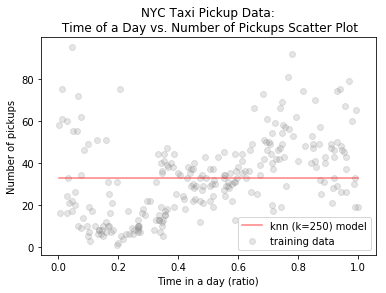

In [6]:
plt.plot(X_train_sorted, knn_model_250.predict(X_train_sorted), color='red', alpha=0.5, label='knn (k=250) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

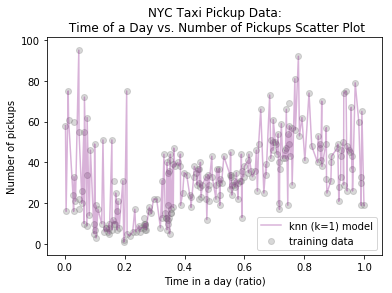

In [7]:
plt.plot(X_train_sorted, knn_model_1.predict(X_train_sorted), color='purple', alpha=0.3, label='knn (k=1) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.3, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

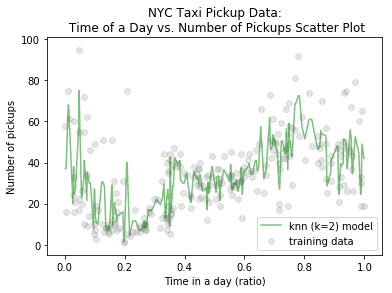

In [8]:
plt.plot(X_train_sorted, knn_model_2.predict(X_train_sorted), color='green', alpha=0.5, label='knn (k=2) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

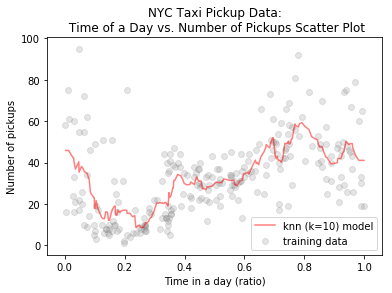

In [9]:
plt.plot(X_train_sorted, knn_model_10.predict(X_train_sorted), color='red', alpha=0.5, label='knn (k=10) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

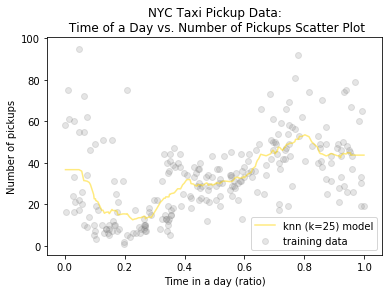

In [10]:
plt.plot(X_train_sorted, knn_model_25.predict(X_train_sorted), color='gold', alpha=0.5, label='knn (k=25) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

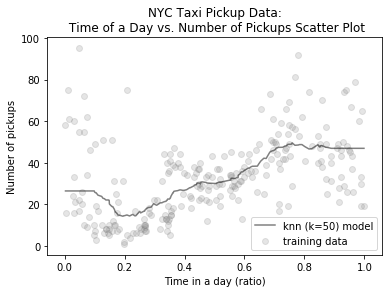

In [11]:
plt.plot(X_train_sorted, knn_model_50.predict(X_train_sorted), color='black', alpha=0.5, label='knn (k=50) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

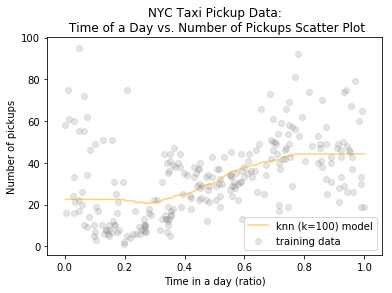

In [12]:
plt.plot(X_train_sorted, knn_model_100.predict(X_train_sorted), color='orange', alpha=0.5, label='knn (k=100) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

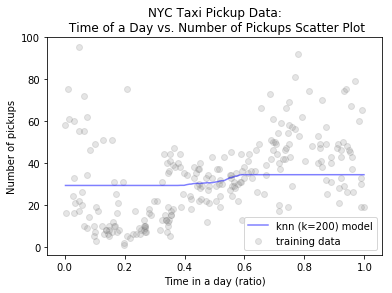

In [13]:
plt.plot(X_train_sorted, knn_model_200.predict(X_train_sorted), color='blue', alpha=0.5, label='knn (k=200) model')
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc='best')

### ANSWER: How does the value of  k  effect the fitted model?

When k is very small, say k=2, the regression model only takes 2 nearest neighbours to calculate their average. So the fitted line will go up and down rapidly, like a zig-zag line. As k grows, it will take more neighbours to calculate the average, and thus the regression line will become more smooth. As the extreme case talked above, when k is the size of the training dataset, it will become a straight line.

In [14]:
test = pd.read_csv('data/dataset_1_test.txt', sep=",")
test.TimeMin = test.TimeMin/1440

X_test = test['TimeMin'].values
y_test = test['PickupCount'].values
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_test_sorted = np.sort(X_test, axis=None)
X_test_sorted = X_test_sorted.reshape(-1,1)

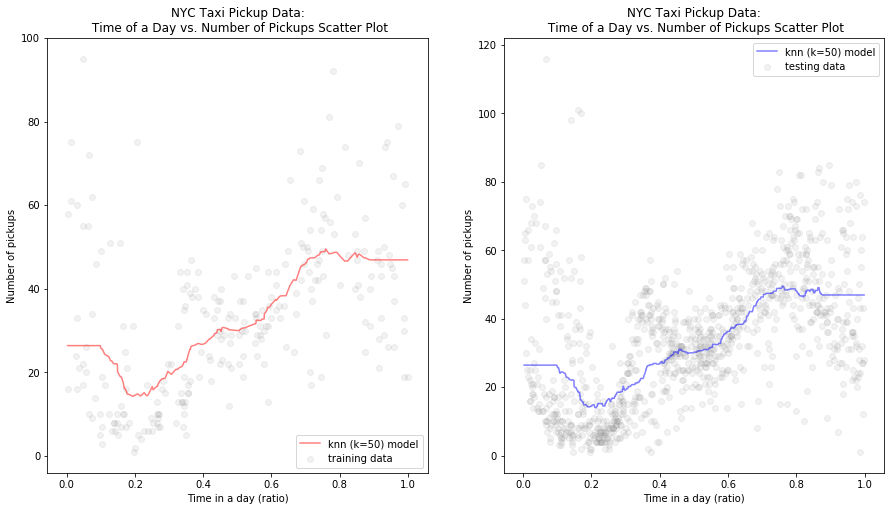

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(X_train_sorted, knn_model_50.predict(X_train_sorted), color='red', alpha=0.5, label='knn (k=50) model')
ax[0].scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')

ax[0].set_xlabel('Time in a day (ratio)')
ax[0].set_ylabel('Number of pickups')
ax[0].set_title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
ax[0].legend(loc="best")


ax[1].plot(X_test_sorted, knn_model_50.predict(X_test_sorted), color='blue', alpha=0.5, label='knn (k=50) model')
ax[1].scatter(X_test, y_test, color='gray', alpha=0.1, label='testing data')

ax[1].set_xlabel('Time in a day (ratio)')
ax[1].set_ylabel('Number of pickups')
ax[1].set_title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
ax[1].legend(loc="best")

### ANSWER: Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?

In [16]:
print("k_NN with k=1: train R^2 = {}, test R^2 = {}".format(knn_model_1.score(X_train, y_train), knn_model_1.score(X_test, y_test)))
print("k_NN with k=2: train R^2 = {}, test R^2 = {}".format(knn_model_2.score(X_train, y_train), knn_model_2.score(X_test, y_test)))
print("k_NN with k=10: train R^2 = {}, test R^2 = {}".format(knn_model_10.score(X_train, y_train), knn_model_10.score(X_test, y_test)))
print("k_NN with k=25: train R^2 = {}, test R^2 = {}".format(knn_model_25.score(X_train, y_train), knn_model_25.score(X_test, y_test)))
print("k_NN with k=50: train R^2 = {}, test R^2 = {}".format(knn_model_50.score(X_train, y_train), knn_model_50.score(X_test, y_test)))
print("k_NN with k=100: train R^2 = {}, test R^2 = {}".format(knn_model_100.score(X_train, y_train), knn_model_100.score(X_test, y_test)))
print("k_NN with k=200: train R^2 = {}, test R^2 = {}".format(knn_model_200.score(X_train, y_train), knn_model_200.score(X_test, y_test)))
print("k_NN with k=250: train R^2 = {}, test R^2 = {}".format(knn_model_250.score(X_train, y_train), knn_model_250.score(X_test, y_test)))

k_NN with k=1: train R^2 = 0.8108889086047287, test R^2 = -0.04560301563038216
k_NN with k=2: train R^2 = 0.6454040692744734, test R^2 = 0.23298509885774188
k_NN with k=10: train R^2 = 0.45770521849580365, test R^2 = 0.41724791407053397
k_NN with k=25: train R^2 = 0.4194670658749883, test R^2 = 0.41365598420422983
k_NN with k=50: train R^2 = 0.35325229524195634, test R^2 = 0.38047568461148934
k_NN with k=100: train R^2 = 0.2870278573586439, test R^2 = 0.3118464863374867
k_NN with k=200: train R^2 = 0.10863100988399976, test R^2 = 0.10953014692642915
k_NN with k=250: train R^2 = 0.0, test R^2 = -0.000860675460460314


From the above calculation, we can see that sometimes the $R^2$ value is negative, for examle, the $R^2$ for the testing data using the k-NN (k=1) model is negative. This indicates that using the k-NN model with k=1, it fits the test dataset very badly. This makes sense because we only take 1 nearest neighbour in the training dataset.

We can also see that using k-NN model with k=250, which is the size of the training dataset, the $R^2$ value is 0. This means that the model does not explain the variance of the data around its mean. The model always predicts the expected value of y, regardless of input features. When k is the size of the dataset, $\hat{y}$ is the same as $\bar{y}$, so $R^2$ will be zero.

### ANSWER: Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

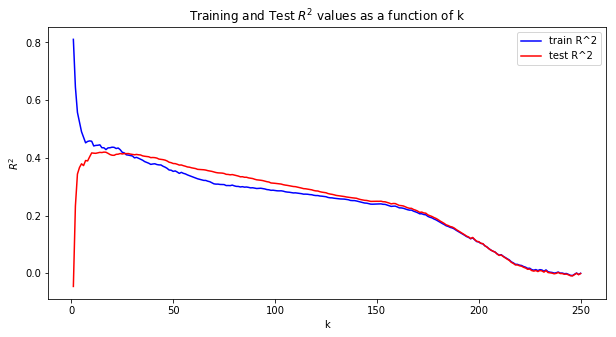

In [17]:
train_R_sq = []
test_R_sq = []
for i in range (1, X_train.shape[0]+1):
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    knn.fit(X_train, y_train)
    train_R_sq.append(knn.score(X_train, y_train))
    test_R_sq.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(1, X_train.shape[0] + 1), train_R_sq, color='blue', label='train R^2')
ax.plot(range(1, X_train.shape[0] + 1), test_R_sq, color='red', label='test R^2')

ax.set_title('Training and Test $R^2$ values as a function of k')
ax.set_xlabel('k')
ax.set_ylabel('$R^2$')
ax.legend(loc='best')

From the above plot we can see that $R^2$ value starts very high for the training dataset, and drops quickly. On the contrary, $R^2$ value for the test dataset starts very low, but grows fast. When k gets around 10, $R^2$ value for both training and test dataset converge and gradually decrease.

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [18]:
X_train_slg = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_train_slg)
results = regr.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           3.43e-14
Time:                        21:56:45   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.0

In [19]:
X_test_slg = sm.add_constant(X_test)
y_pred = results.predict(X_test_slg)
r2_slg = r2_score(y_test, y_pred)
print("R^2 value of the training dataset is 0.207")
print("R^2 value of the test dataset is", r2_slg)

R^2 value of the training dataset is 0.207
R^2 value of the test dataset is 0.247712329948


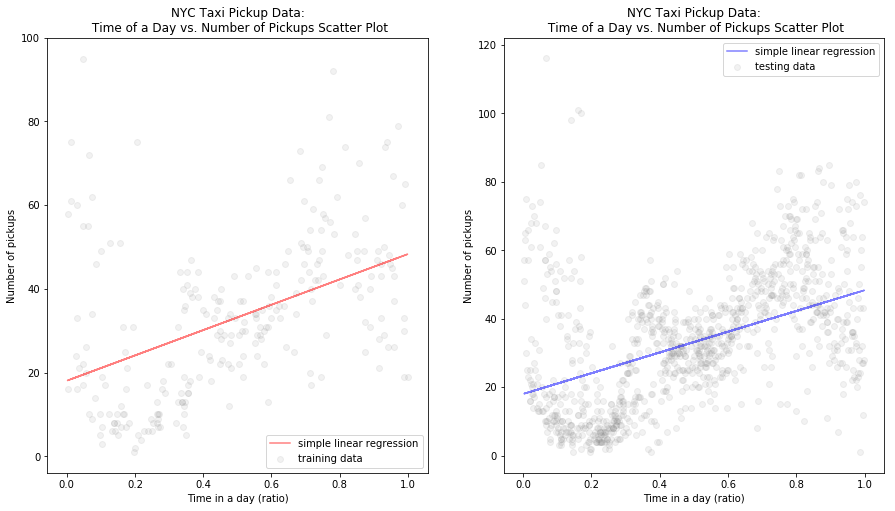

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(X_train, results.predict(X_train_slg).reshape(-1,1), color='red', alpha=0.5, label='simple linear regression')
ax[0].scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')

ax[0].set_xlabel('Time in a day (ratio)')
ax[0].set_ylabel('Number of pickups')
ax[0].set_title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
ax[0].legend(loc="best")


ax[1].plot(X_test, results.predict(X_test_slg).reshape(-1,1), color='blue', alpha=0.5, label='simple linear regression')
ax[1].scatter(X_test, y_test, color='gray', alpha=0.1, label='testing data')

ax[1].set_xlabel('Time in a day (ratio)')
ax[1].set_ylabel('Number of pickups')
ax[1].set_title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
ax[1].legend(loc="best")

### ANSWER: How does the test  $R^2$  score compare with the best test  $R^2$  value obtained with k-NN regression in Part (a)?

The $R^2$ score of the test dataset is about 0.25 using simple linear regression. In the previous k-NN regression, the best test $R^2$ value is about 0.4, which is higher than the one from simple linear regression. So k-NN regression is better than simple linear regression for this dataset.

In [21]:
beta0 = results.params[0]
beta1 = results.params[1]
print("(beta0, beta1) = (%f, %f)" %(beta0, beta1))

(beta0, beta1) = (18.026385, 30.289023)


### ANSWER: What does the sign of the slope convey about the data?

The slope $\beta1$ is 30.289 which is positive. It is saying that the number of taxi pickups should grow as time passes in a day.

### ANSWER: Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?

In [22]:
results.conf_int() # default alpha=0.05, 95% confidence interval

array([[ 13.84986472,  22.20290563],
       [ 22.879319  ,  37.69872697]])

Since the confidence interval is relatively wide, I think the estimates of the model parameters are not very reliable.

### ANSWER: Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

The 99% confidence interval for the slope and intercept should be looser (wider) than the 95% intervals. 99% confidence interval means that I am 99% certain that true values will be in this interval. If I want to be more certain than 95%, I must widen the interval.

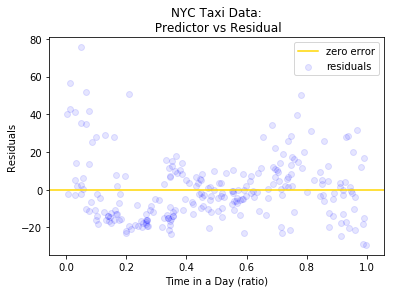

In [23]:
errors = y_train - results.predict(X_train_slg).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

### ANSWER: Using this residual plot, comment on whether the assumption of linearity is valid for this data.

From the residual plot,we can see that it has a fairly random pattern, which means a linear regression model is appropriate for the data. Therefore, the assumption of linearity is valid for this data.

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

### ANSWER: By visual inspection, what polynomial degree do you think would provide the best fit for the data?

By merely visual inspection, I guess a polynomial with degree 4 might fit the data.

### ANSWER: At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

Originally the time predictor is measured in minutes, and hence the scale is quite big, whose maximum is 1440. With such high numeric values, it can make interpreting the coefficients from the regression difficult, because then the coefficients will be very small.

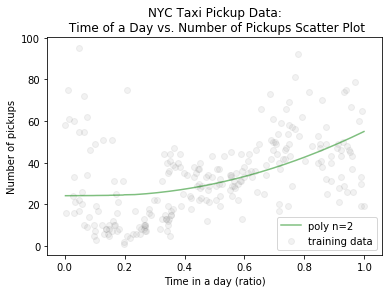

In [24]:
poly2 = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.fit_transform(X_test)

# poly2_regr = sm.OLS(y_train, X_train_poly2)
# poly2_results = poly2_regr.fit()

# plt.plot(X_train, poly2_results.predict(X_train_poly2).reshape(-1,1), color='red', alpha=0.5, label='poly n=2')
# plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
# plt.xlabel('Time in a day (ratio)')
# plt.ylabel('Number of pickups')
# plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
# plt.legend(loc="best")

poly2_model = LinearRegression(fit_intercept=True)
poly2_model.fit(X_train_poly2, y_train)

poly2_y_train = np.sort(poly2_model.predict(X_train_poly2), axis=None)
poly2_y_train = poly2_y_train.reshape(-1,1)
plt.plot(X_train_sorted, poly2_y_train, color='green', alpha=0.5, label='poly n=2')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

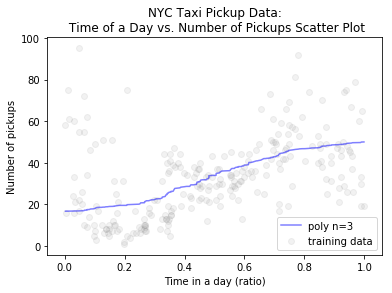

In [25]:
poly3 = PolynomialFeatures(degree=3, interaction_only=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.fit_transform(X_test)

poly3_model = LinearRegression(fit_intercept=True)
poly3_model.fit(X_train_poly3, y_train)

poly3_y_train = np.sort(poly3_model.predict(X_train_poly3), axis=None)
poly3_y_train = poly3_y_train.reshape(-1,1)

plt.plot(X_train_sorted, poly3_y_train, color='blue', alpha=0.5, label='poly n=3')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

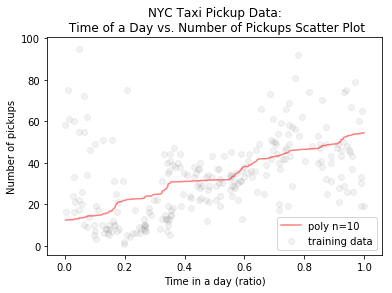

In [26]:
poly10 = PolynomialFeatures(degree=10, interaction_only=False)
X_train_poly10 = poly10.fit_transform(X_train)
X_test_poly10 = poly10.fit_transform(X_test)

poly10_model = LinearRegression(fit_intercept=True)
poly10_model.fit(X_train_poly10, y_train)

poly10_y_train = np.sort(poly10_model.predict(X_train_poly10), axis=None)
poly10_y_train = poly10_y_train.reshape(-1,1)

plt.plot(X_train_sorted, poly10_y_train, color='red', alpha=0.5, label='poly n=10')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

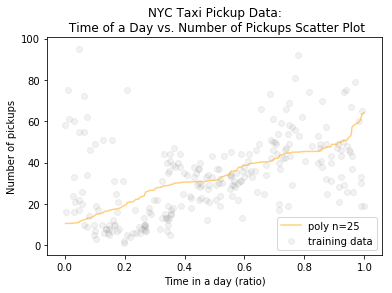

In [27]:
poly25 = PolynomialFeatures(degree=25, interaction_only=False)
X_train_poly25 = poly25.fit_transform(X_train)
X_test_poly25 = poly25.fit_transform(X_test)

poly25_model = LinearRegression(fit_intercept=True)
poly25_model.fit(X_train_poly25, y_train)

poly25_y_train = np.sort(poly25_model.predict(X_train_poly25), axis=None)
poly25_y_train = poly25_y_train.reshape(-1,1)

plt.plot(X_train_sorted, poly25_y_train, color='orange', alpha=0.5, label='poly n=25')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

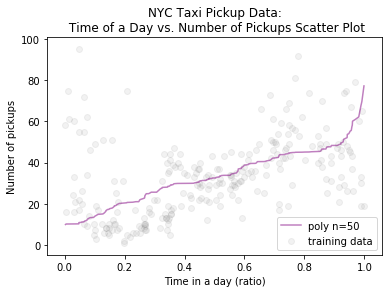

In [28]:
poly50 = PolynomialFeatures(degree=50, interaction_only=False)
X_train_poly50 = poly50.fit_transform(X_train)
X_test_poly50 = poly50.fit_transform(X_test)

poly50_model = LinearRegression(fit_intercept=True)
poly50_model.fit(X_train_poly50, y_train)

poly50_y_train = np.sort(poly50_model.predict(X_train_poly50), axis=None)
poly50_y_train = poly50_y_train.reshape(-1,1)

plt.plot(X_train_sorted, poly50_y_train, color='purple', alpha=0.5, label='poly n=50')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

#### ANSWER: Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

In [29]:
R2_poly2_train = poly2_model.score(X_train_poly2, y_train)
R2_poly2_test = poly2_model.score(X_test_poly2, y_test)
R2_poly3_train = poly3_model.score(X_train_poly3, y_train)
R2_poly3_test = poly3_model.score(X_test_poly3, y_test)
R2_poly10_train = poly10_model.score(X_train_poly10, y_train)
R2_poly10_test = poly10_model.score(X_test_poly10, y_test)
R2_poly25_train = poly25_model.score(X_train_poly25, y_train)
R2_poly25_test = poly25_model.score(X_test_poly25, y_test)
R2_poly50_train = poly50_model.score(X_train_poly50, y_train)
R2_poly50_test = poly50_model.score(X_test_poly50, y_test)
print("R^2 value for the Polynomial Regression models:")
print("degree=2: train R^2 = {}, test R^2 = {}".format(R2_poly2_train, R2_poly2_test))
print("degree=3: train R^2 = {}, test R^2 = {}".format(R2_poly3_train, R2_poly3_test))
print("degree=10: train R^2 = {}, test R^2 = {}".format(R2_poly10_train, R2_poly10_test))
print("degree=25: train R^2 = {}, test R^2 = {}".format(R2_poly25_train, R2_poly25_test))
print("degree=50: train R^2 = {}, test R^2 = {}".format(R2_poly50_train, R2_poly50_test))

R^2 value for the Polynomial Regression models:
degree=2: train R^2 = 0.2324332710285808, test R^2 = 0.25572414216191586
degree=3: train R^2 = 0.3748362391177079, test R^2 = 0.378584362248167
degree=10: train R^2 = 0.4282770686192734, test R^2 = 0.40200780067431374
degree=25: train R^2 = 0.46661376166883406, test R^2 = 0.3927519382470862
degree=50: train R^2 = 0.4812774698473774, test R^2 = 0.2858641915932495


When degrees are 2, 3, 10, we can see that $R^2$ of the test sets goes up as $R^2$ of the training set grows. However, when degree gets to 25 and 50, even though $R^2$ scores of the training sets keep growing, the scores of the test sets decrease. So a high training $R^2$ value does not necessarily mean that the test $R^2$ value is also high. This might be due to the problem of overfitting.

The best test $R^2$ score in the above polynomial regression models is 0.40, when polynomial degree is 10. Previously, simple linear regression in Part(b) gives test $R^2$ score of about 0.25, and the best test $R^2$ score of 0.42 when k=10. We can see that both polynomial regression with degree of 10 and k-NN with k=10 give satisfying $R^2$ scores, while simple linear regression model does not fit very well.

#### ANSWER: Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

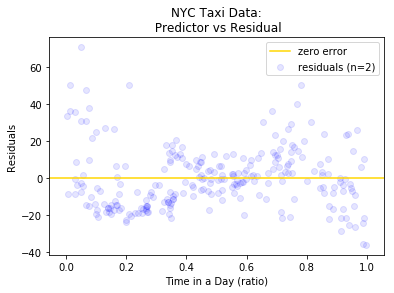

In [30]:
errors = y_train - poly2_model.predict(X_train_poly2).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals (n=2)")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

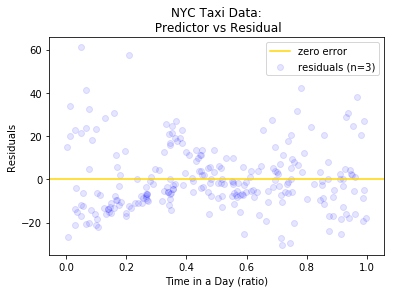

In [31]:
errors = y_train - poly3_model.predict(X_train_poly3).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals (n=3)")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

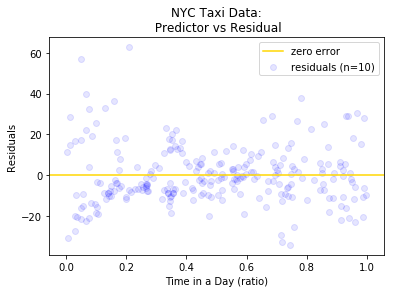

In [32]:
errors = y_train - poly10_model.predict(X_train_poly10).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals (n=10)")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

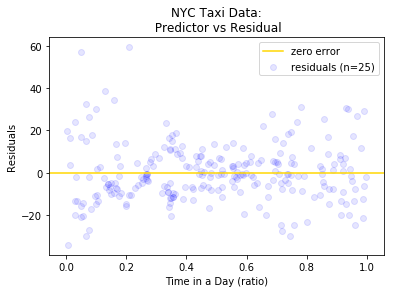

In [33]:
errors = y_train - poly25_model.predict(X_train_poly25).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals (n=25)")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

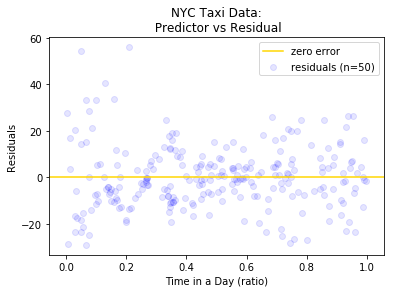

In [34]:
errors = y_train - poly50_model.predict(X_train_poly50).reshape(-1,1)
plt.scatter(X_train, errors, color="blue", alpha=0.1, label="residuals (n=50)")
plt.axhline(y=0, color="gold", label="zero error")
plt.xlabel("Time in a Day (ratio)")
plt.ylabel("Residuals")
plt.title("NYC Taxi Data:\n Predictor vs Residual")
plt.legend(loc="best")

As the degree of polynomial regression models increases, the residuals tend to gather around the zero error line more closely. However, when n gets bigger than 10, the pattern of residuals does not change very much, and they even tend to spread a little bit more loosely.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



parameters: 
 [  43.7745588  -237.10131377  610.42624052 -380.54845873]
confidence intervals for the parameters: 
 [[  36.2562973    51.29282029]
 [-302.28641364 -171.9162139 ]
 [ 458.22715702  762.62532401]
 [-480.67973965 -280.4171778 ]]
train R^2 = 0.3748362391177079, test R^2 = 0.378584362248167


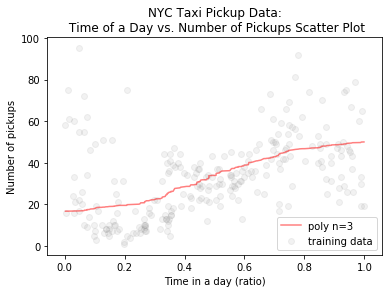

In [35]:
poly3_regr = sm.OLS(y_train, X_train_poly3)
poly3_results = poly3_regr.fit()

ytrain_poly3 = poly3_results.predict(X_train_poly3).reshape(-1,1)
ytrain_poly3 = np.sort(ytrain_poly3, axis=None)

plt.plot(X_train_sorted, ytrain_poly3.reshape(-1,1), color='red', alpha=0.5, label='poly n=3')
plt.scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')
plt.xlabel('Time in a day (ratio)')
plt.ylabel('Number of pickups')
plt.title('NYC Taxi Pickup Data:\n Time of a Day vs. Number of Pickups Scatter Plot')
plt.legend(loc="best")

print("parameters: \n", poly3_results.params)
print("confidence intervals for the parameters: \n", poly3_results.conf_int())
print("train R^2 = {}, test R^2 = {}".format(R2_poly3_train, R2_poly3_test))

I think the polynomial regression model with degree of 3 is the most reasonable one to fit the dataset, which shows a slowly increasing trend in taxi pickups as time elapses in a day. The model gives a relatively high $R^2$ score of 0.38 among all the models above, though not very high. 

However, with a degree of 3, this polynomial regression model is still complicated and risks the issue of overfitting, as we can see the confidence intervals of the parameters are relatively wide. To improve the model, I want to include a few other predictors into the model and make a new multiple linear regression model for the dataset.

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [36]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).

#### Question 1a - Answer
If Y lies in the same subspace as the columns of X, then the prediction of $\hat{Y}$ will be prefect because the distance between Y and $\hat{Y}$ is 0.

#### Question 1b - Answer

If we can find many significant predictor vectors, then we can construct many subspaces, and calculate the distance between the new vector and its projection onto those subspaces. In this way, we can compare those distances and pick the minimum one, which makes the classification more accurate and thus re-construct the image.

#### Question 1c - Answer

In [37]:
def hat(X):
    X_t = np.transpose(X)
    return X.dot(np.linalg.inv(X_t.dot(X))).dot(X_t)
S0_t = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            ])
S1_t = np.array([
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
S0 = np.transpose(S0_t)
S1 = np.transpose(S1_t)

H0 = hat(S0)
H1 = hat(S1)
y_hat0 = H0.dot(y_0)
y_hat1 = H1.dot(y_0)

print("y_hat0 = ", y_hat0)
print("y_hat1 = ", y_hat1)

dis0 = np.linalg.norm(y_0-y_hat0)
dis1 = np.linalg.norm(y_0-y_hat1)
print("distance to y_hat0:", dis0)
print("distance to y_hat1:", dis1)

y_hat0 =  [  2.  10.   0.   0.   0.]
y_hat1 =  [ 0.  0.  0.  0.  0.]
distance to y_hat0: 1.0
distance to y_hat1: 10.246950766


Since the distance between y_0 and its projection onto subspace S0 is shorter than the distance to its projection onto S1, the method will classify y_0 to the subspace S0.

#### Question 1d - Answer

Total variation in y (Total sum of squares): $$SST = \sum_{i=1}^{n} (y_i-\bar{y})^2$$ <br />
Regression sum of squares: $$SSR = \sum_{i=1}^{n} (\hat{y_i}-\bar{y})^2$$ <br />
Error sum of squares: $$SSE = \sum_{i=1}^{n} (y_i-\hat{y_i})^2$$ <br />
Note: SST = SSR + SSE <br />
The percentage of the variation in y that can be explained by x, i.e.
$$R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}$$ <br />
$$F = \frac{SSR/p}{SSE/(n-p-1)} = \frac{SSR}{SSE} \cdot \frac{n-p-1}{p} = (\frac{SST}{SSE}-1) \cdot \frac{n-p-1}{p}$$ <br />
$$\frac{SSE}{SST} = 1-R^2$$ <br />
So we have $$\frac{SST}{SSE} = \frac{1}{1-R^2}$$ <br />
Therefore, $$F = (\frac{1}{1-R^2} -1) \cdot \frac{n-p-1}{p} = \frac{R^2}{1-R^2} \cdot \frac{n-p-1}{p}$$ <br />
where p is the DF (degree of freedom) of SSR, (n-p-1) is the DF of SSE, and (n-1) is the DF of SST.